In [ ]:
!pip install --upgrade pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.6 MB/s eta 0:00:00
   ━━━━

In [1]:
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

In [20]:
data=pd.read_csv('Fuel_cell_performance_data-Full.csv')

In [22]:
X = data.drop(columns=['Target1', 'Target2', 'Target3', 'Target4', 'Target5'])
y = data['Target5']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
results = []



In [25]:
cm= compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,15.5148,478.3999,21.4956,0.7653,0.3731,0.3751,0.3380
gbr,Gradient Boosting Regressor,15.1346,468.8006,21.4893,0.7639,0.3857,0.3385,0.2480
lightgbm,Light Gradient Boosting Machine,15.3636,473.0842,21.5408,0.7639,0.3734,0.3476,0.5160
rf,Random Forest Regressor,15.9865,512.2237,22.3279,0.7472,0.3896,0.3912,0.6480
lasso,Lasso Regression,18.3886,574.5135,23.6649,0.7150,0.5404,0.5821,0.0240
llar,Lasso Least Angle Regression,18.3886,574.5137,23.6649,0.7150,0.5404,0.5821,0.0260
ridge,Ridge Regression,18.5091,575.1906,23.7015,0.7137,0.5225,0.5884,0.0280
lr,Linear Regression,18.5198,575.7126,23.7130,0.7134,0.5218,0.5890,0.7530
lar,Least Angle Regression,18.5835,576.3318,23.7336,0.7123,0.5425,0.5955,0.0290
en,Elastic Net,18.6551,599.2995,24.1722,0.7025,0.5442,0.5869,0.0240


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}


In [28]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "MAE": mae, "MSE": mse, "R2": r2})


In [29]:
results_df = pd.DataFrame(results)
print(results_df)

               Model        MAE         MSE        R2
0  Linear Regression  19.284961  622.363851  0.694349
1      Decision Tree  20.152100  818.860754  0.597847
2      Random Forest  14.821430  455.734388  0.776183
3  Gradient Boosting  15.428807  464.746933  0.771757


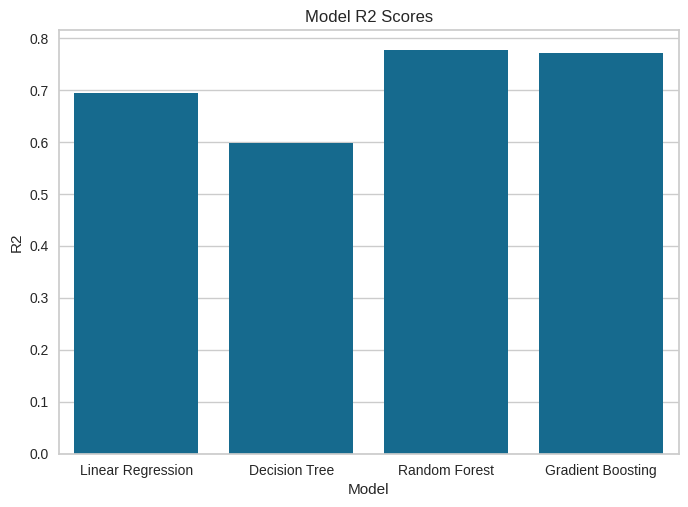

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for R2 scores
sns.barplot(x='Model', y='R2', data=results_df)
plt.title('Model R2 Scores')
plt.show()

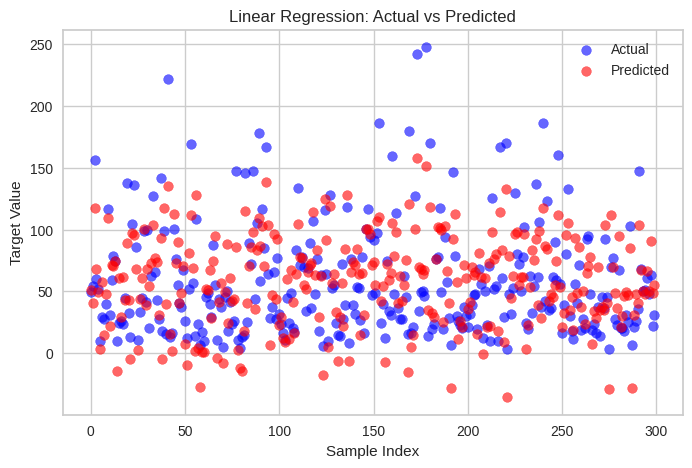

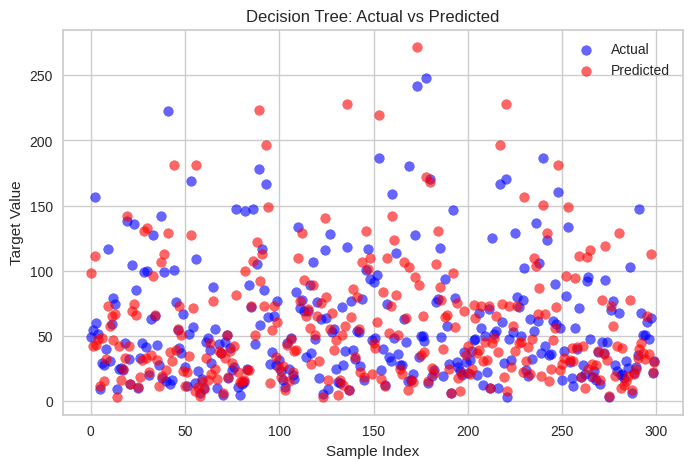

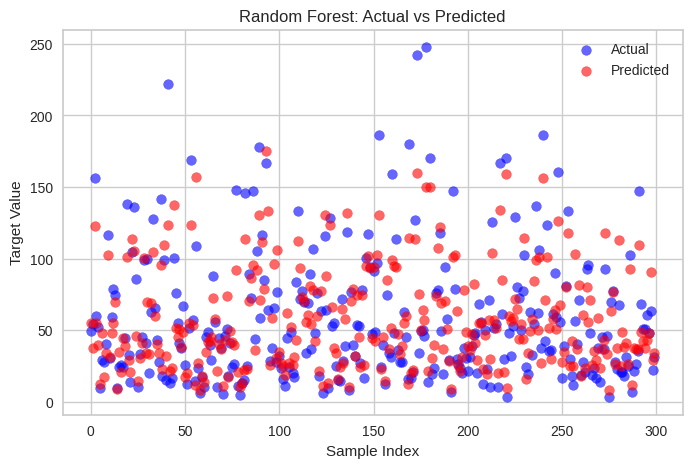

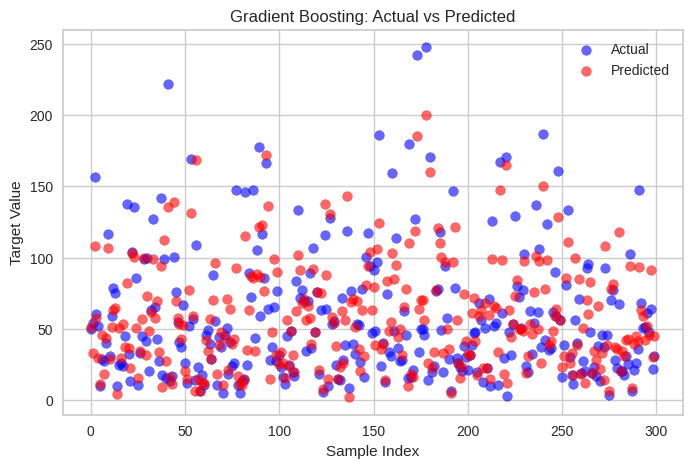

In [31]:

for name, model in models.items():
    y_pred = model.predict(X_test)

    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.6)
    plt.title(f'{name}: Actual vs Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel('Target Value')
    plt.legend()
    plt.show()
